In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


2024-09-02 17:04:43.062961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 17:04:43.063135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 17:04:43.211367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df_train = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv')


In [4]:
df_test = pd.read_csv(r'/kaggle/input/playground-series-s4e1/test.csv')

In [5]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df_train.shape

(165034, 14)

In [7]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7dc0e9e16f80>,
 'caps': [<matplotlib.lines.Line2D at 0x7dc0e9e174c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dc0e9e16ce0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dc0e9e17a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dc0e9e17ca0>],
 'means': []}

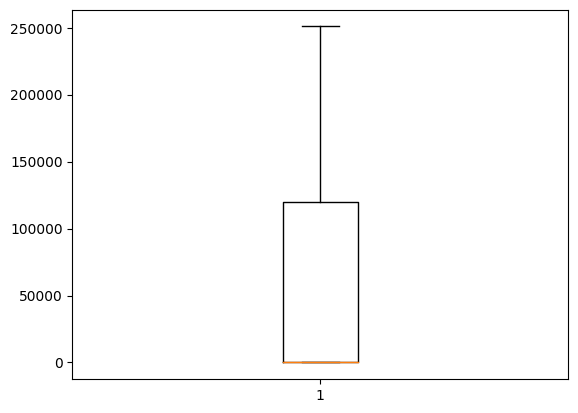

In [10]:
plt.boxplot(df_train['Balance'])

In [11]:
X = df_train.drop('Exited', axis = 1)
Y = df_train['Exited']

In [12]:
X.drop(['id','CustomerId','Surname'], axis = 1, inplace = True)


In [13]:
id = df_test['id']
df_test.drop(['id','CustomerId','Surname'], axis = 1, inplace = True)

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [15]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
ll = LabelEncoder()

In [17]:
X['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df_test['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
ll.fit(X['Gender'])
X['Gender'] = ll.transform(X['Gender'])
df_test['Gender'] =ll.transform(df_test['Gender'])

In [20]:
ll.fit(X['Geography'])
X['Geography'] = ll.transform(X['Geography'])
df_test['Geography'] = ll.transform(df_test['Geography'])

In [21]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.tolist()
numerical_features

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [22]:
ss = StandardScaler()

In [23]:
for col in numerical_features:
    ss.fit(X[col].values.reshape(-1,1))
    X[col] = ss.transform(X[col].values.reshape(-1,1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1,1))

In [24]:
#ss.fit(X['Balance'].values.reshape(-1,1))

In [25]:
#X['Balance'] = ss.transform(X['Balance'].values.reshape(-1,1))
#df_test['Balance'] = ss.transform(df_test['Balance'].values.reshape(-1,1))

In [26]:
X.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05,1.650340e+05
mean,-3.874243e-16,-6.415094e-17,7.152400e-17,7.875928e-16,-4.680005e-17,-3.349626e-17,-5.963024e-18,8.890718e-17,-3.067621e-17,-3.231873e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.825749e+00,-7.942293e-01,-1.138349e+00,-2.269706e+00,-1.789054e+00,-8.831633e-01,-1.013348e+00,-1.750507e+00,-9.955502e-01,-2.238162e+00
25%,-7.422231e-01,-7.942293e-01,-1.138349e+00,-6.908498e-01,-7.199734e-01,-8.831633e-01,-1.013348e+00,5.712629e-01,-9.955502e-01,-7.543290e-01
50%,3.177938e-02,-7.942293e-01,8.784655e-01,-1.269725e-01,-7.253134e-03,-8.831633e-01,8.142976e-01,5.712629e-01,-9.955502e-01,1.068381e-01
75%,6.684589e-01,4.304029e-01,8.784655e-01,4.369048e-01,7.054671e-01,1.026170e+00,8.142976e-01,5.712629e-01,1.004470e+00,8.465967e-01
max,2.416207e+00,1.655035e+00,8.784655e-01,6.075677e+00,1.774548e+00,3.110918e+00,4.469589e+00,5.712629e-01,1.004470e+00,1.738177e+00


In [27]:
X.loc[X['Balance']>1.5,'Balance'] = 1.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7dc0e9d5d960>,
 'caps': [<matplotlib.lines.Line2D at 0x7dc0e9d5dea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dc0e9d5c5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dc0e9d5e3e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dc0e9d5e680>],
 'means': []}

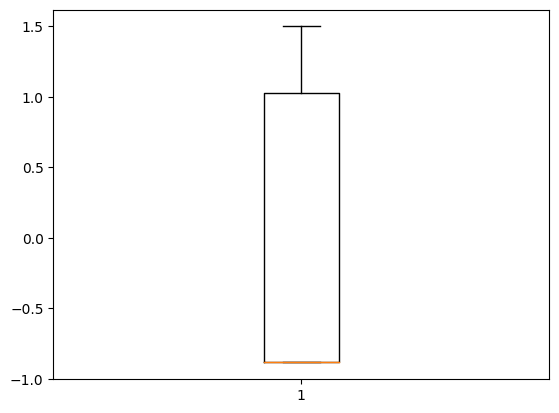

In [28]:
plt.boxplot(X['Balance'])

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.144135,-0.794229,0.878465,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486
1,-0.367706,-0.794229,0.878465,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085
2,0.268974,-0.794229,0.878465,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422
3,-0.941966,-0.794229,0.878465,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018
4,0.743362,1.655035,0.878465,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770


In [30]:
X.shape

(165034, 10)

In [31]:
model = Sequential([
    tf.keras.Input(shape = (10,)),
    Dense(10,activation = 'relu'),
    Dropout(0.15),
    Dense(4, activation = 'relu'),
    Dropout(0.15),
    Dense(1, activation = 'sigmoid')
])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
X_train,X_test,Y_train,T_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [34]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['accuracy'])

In [35]:
model.fit(X_train,Y_train, epochs = 100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4126/4126 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8211 - loss: 0.4105
Epoch 2/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8443 - loss: 0.3656
Epoch 3/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8476 - loss: 0.3628
Epoch 4/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8464 - loss: 0.3640
Epoch 5/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8443 - loss: 0.3656
Epoch 6/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8489 - loss: 0.3599
Epoch 7/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8452 - loss: 0.3618
Epoch 8/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8460 - loss: 0.3620
Epoch 9/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8471 - loss: 0.3594
Epoch 10/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8477 - loss: 0.3605
Epoch 11/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8484 - loss: 0.3603
Epoch 12/100
4126/4126 ━━━━━━━━

In [36]:
loss, accuracy = model.evaluate(X_test,T_test)

  45/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8544 - loss: 0.3511    

/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8482 - loss: 0.3467


In [37]:
print(f'Loss: {loss} , Accuracy : {accuracy}')

Loss: 0.3462763726711273 , Accuracy : 0.8490623235702515


In [38]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.879546,-0.794229,-1.138349,-1.705829,-1.076334,-0.883163,0.814298,-1.750507,1.00447,0.962404
1,0.331393,-0.794229,-1.138349,0.888007,-1.076334,-0.883163,-1.013348,0.571263,-0.99555,-0.795852
2,-0.005672,-0.794229,-1.138349,-0.465299,0.705467,-0.883163,0.814298,0.571263,-0.99555,0.523083
3,0.306425,-0.794229,0.878465,-0.239748,1.061827,-0.883163,-1.013348,0.571263,-0.99555,0.026977
4,1.192783,0.430403,0.878465,-0.014197,1.774548,1.047249,-1.013348,0.571263,-0.99555,0.533997


In [39]:
predictions = model.predict(df_test)

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [56]:
predictions = np.array(predictions).flatten()

In [54]:
id = np.array(id).flatten()

In [57]:
submission = pd.DataFrame({
    'id': id,
    'Exited': predictions
})

In [58]:
submission.head()

,id,Exited
0,165034,0.029525
1,165035,0.684344
2,165036,0.053989
3,165037,0.296204
4,165038,0.391867


In [59]:
submission.to_csv('submission.csv')